In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv("drive/MyDrive/BRIN_Dataset/inacoved_praproses.csv")
df

,date_published,event_daily_news
0,2020-01-07,0
1,2020-01-13,1
2,2020-01-14,0
3,2020-01-20,1
4,2020-01-21,0
...,...,...
122,2020-05-18,157
123,2020-05-19,203
124,2020-05-20,161
125,2020-05-21,163


In [ ]:
df.to_csv('daily_news_hasil_2.csv',index=False)

<ipython-input-4-e5a0941ae1cc>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-4-e5a0941ae1cc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv("/content/daily_news_hasil_2.csv", header=0, index_col=0, squeeze=True)


date_published
2020-01-07    0
2020-01-13    1
2020-01-14    0
2020-01-20    1
2020-01-21    0
Name: event_daily_news, dtype: int64


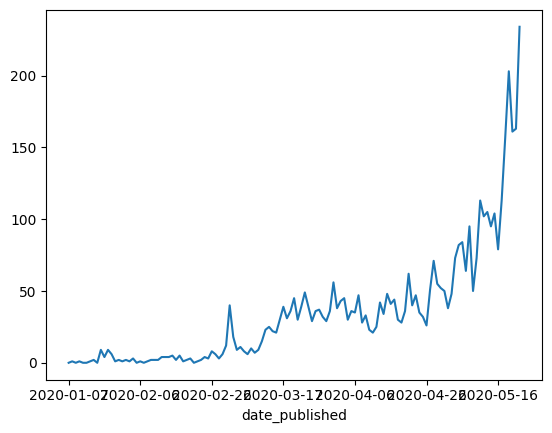

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

series = read_csv("/content/daily_news_hasil_2.csv", header=0, index_col=0, squeeze=True)

print(series.head())
series.plot()
pyplot.show()

In [ ]:
from pandas import read_csv
import pandas as pd

# Membaca CSV dan mengonversi kolom tanggal ke tipe datetime
series = read_csv("/content/daily_news_hasil_2.csv", header=0, parse_dates=[0], index_col=0)

# Memastikan bahwa indeks merupakan datetime
series.index = pd.to_datetime(series.index)

# Melakukan resampling
upsampled = series.resample('D').mean()

start_date = '2020-01-01'
end_date = '2020-05-22'
upsampled = upsampled.loc[(upsampled.index >= start_date) & (upsampled.index <= end_date)]

upsampled = upsampled.reset_index()
upsampled.columns = ['Date', 'event_daily_news']

upsampled

,Date,event_daily_news
0,2020-01-07,0.0
1,2020-01-08,NaN
2,2020-01-09,NaN
3,2020-01-10,NaN
4,2020-01-11,NaN
...,...,...
132,2020-05-18,157.0
133,2020-05-19,203.0
134,2020-05-20,161.0
135,2020-05-21,163.0


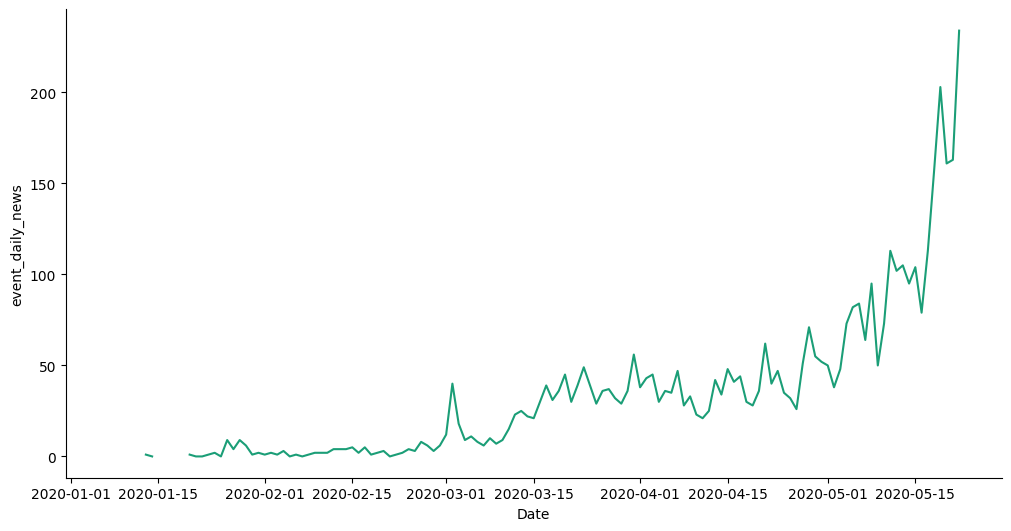

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['event_daily_news']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = upsampled.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('event_daily_news')

In [ ]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# Membaca CSV dan mengonversi kolom tanggal ke tipe datetime
series = read_csv("/content/daily_news_hasil_2.csv", header=0, parse_dates=[0], index_col=0)

# Memastikan bahwa indeks merupakan datetime
series.index = pd.to_datetime(series.index)

# Melakukan resampling
upsampled = series.resample('D').mean()

# Memotong data hanya untuk rentang tanggal yang diinginkan
start_date = '2020-01-01'
end_date = '2020-05-22'
upsampled = upsampled.loc[start_date:end_date]

interpolated_mode = upsampled.interpolate(method='pad')  # atau method='ffill'

# Menambahkan kembali kolom 'Date'
interpolated_mode['date_published'] = interpolated_mode.index
interpolated_mode

,event_daily_news,date_published
date_published,,
2020-01-07,0.0,2020-01-07
2020-01-08,0.0,2020-01-08
2020-01-09,0.0,2020-01-09
2020-01-10,0.0,2020-01-10
2020-01-11,0.0,2020-01-11
...,...,...
2020-05-18,157.0,2020-05-18
2020-05-19,203.0,2020-05-19
2020-05-20,161.0,2020-05-20


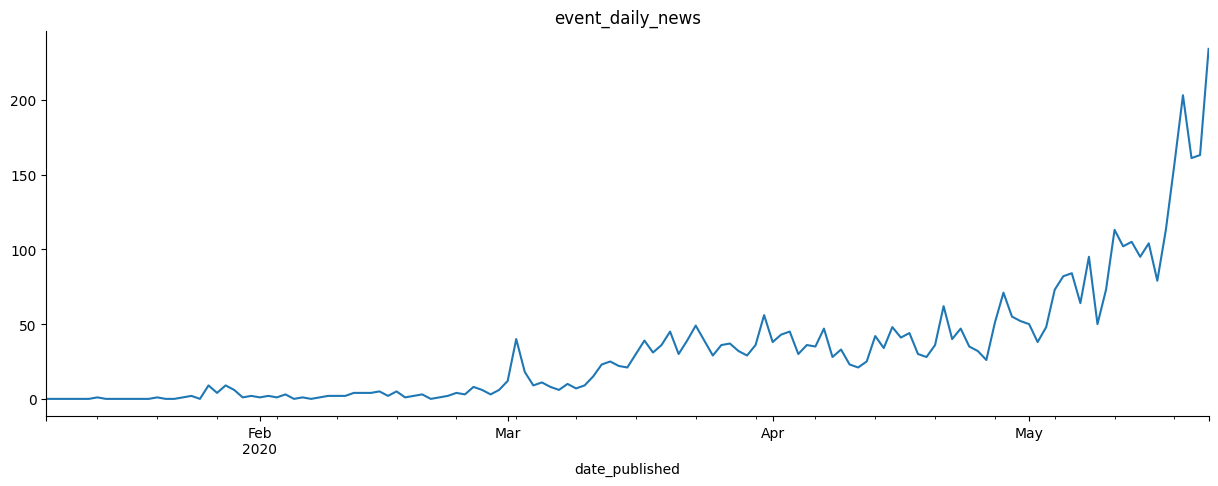

In [ ]:
from matplotlib import pyplot as plt
interpolated_mode['event_daily_news'].plot(kind='line', figsize=(15, 5), title='event_daily_news')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
interpolated_mode.to_csv('daily_news_interpolasi_spl.csv',index=False)